In [24]:
import sys
sys.path.append("/Users/ashish/Desktop/ml/src/python") #  for locating custom library, not available in Jupyter( available in intellij)
from lib import *

print(os.listdir("../data")) # this will list files in input directory


['test.csv', 'data_description.txt', 'train.csv', 'sample_submission.csv']


# Load Data

In [25]:
raw_train,raw_test = load_data()
print(raw_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [11]:
raw_test.info() # nulls in Age, Cabin and embarked ( same as train data), here in Fare Also
raw_test.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal


We are merging data together, so we can process data, after feature engineering we will split 

In [26]:
data=pd.concat([raw_train, raw_test], axis=0).reset_index(drop=True) # concatinating test and train removing index
print(data.info()) # output class will be Nan For test data
data.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
1stFlrSF         2919 non-null int64
2ndFlrSF         2919 non-null int64
3SsnPorch        2919 non-null int64
Alley            198 non-null object
BedroomAbvGr     2919 non-null int64
BldgType         2919 non-null object
BsmtCond         2837 non-null object
BsmtExposure     2837 non-null object
BsmtFinSF1       2918 non-null float64
BsmtFinSF2       2918 non-null float64
BsmtFinType1     2840 non-null object
BsmtFinType2     2839 non-null object
BsmtFullBath     2917 non-null float64
BsmtHalfBath     2917 non-null float64
BsmtQual         2838 non-null object
BsmtUnfSF        2918 non-null float64
CentralAir       2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
Electrical       2918 non-null object
EnclosedPorch    2919 non-null int64
ExterCond        2919 non-null object
ExterQual        2919 non-null object
Exterior1st      291

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007


Distinct Values for  1stFlrSF  are : 1083


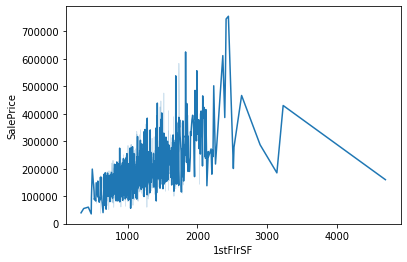

Distinct Values for  2ndFlrSF  are : 635


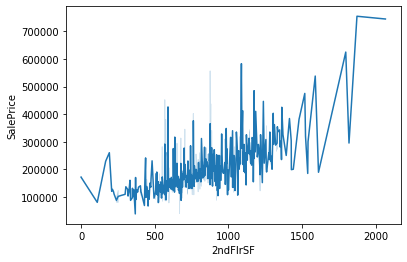

Distinct Values for  3SsnPorch  are : 31


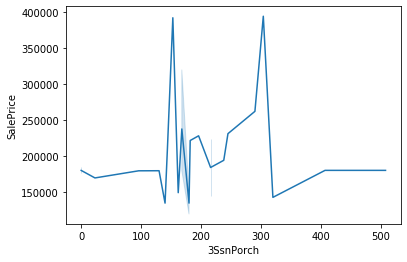

Distinct Values for  Alley  are : 3


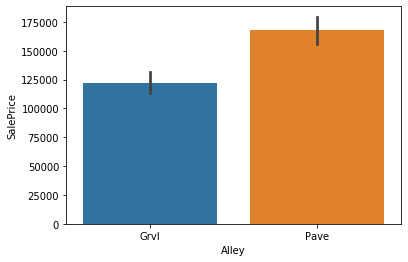

Distinct Values for  BedroomAbvGr  are : 8


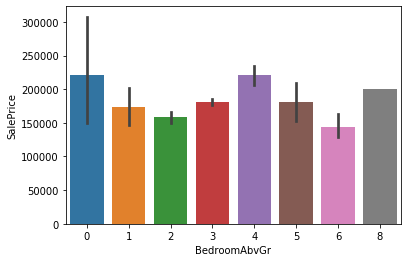

Distinct Values for  BldgType  are : 5


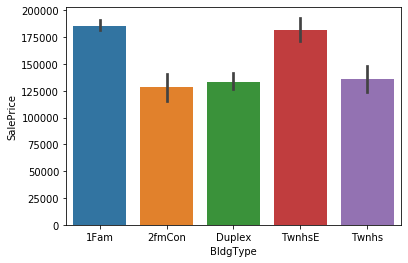

Distinct Values for  BsmtCond  are : 5


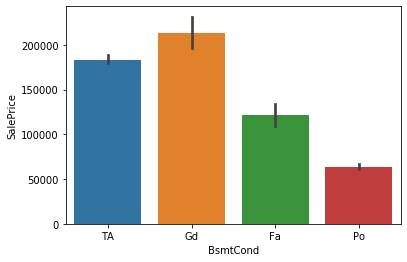

Distinct Values for  BsmtExposure  are : 5


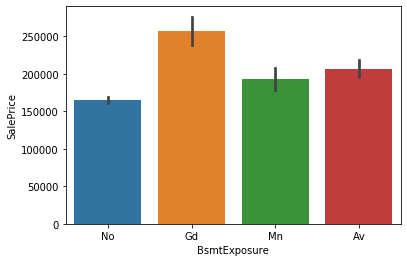

Distinct Values for  BsmtFinSF1  are : 992


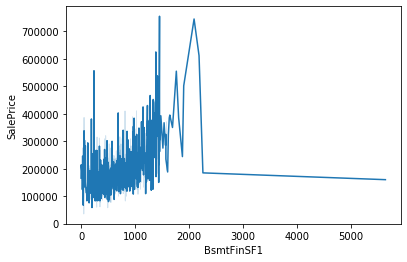

Distinct Values for  BsmtFinSF2  are : 273


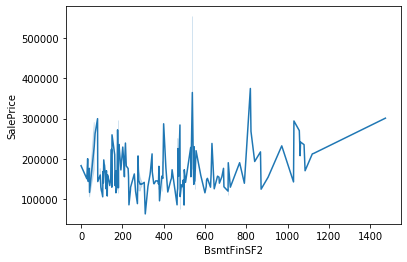

Distinct Values for  BsmtFinType1  are : 7


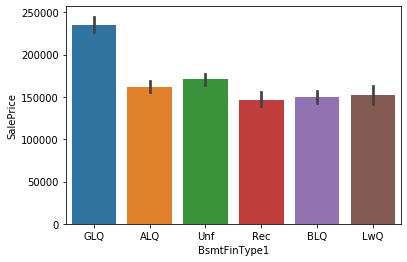

Distinct Values for  BsmtFinType2  are : 7


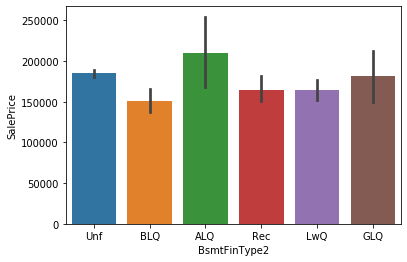

Distinct Values for  BsmtFullBath  are : 5


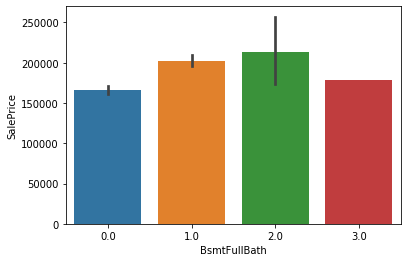

Distinct Values for  BsmtHalfBath  are : 4


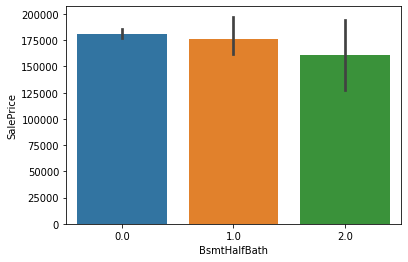

Distinct Values for  BsmtQual  are : 5


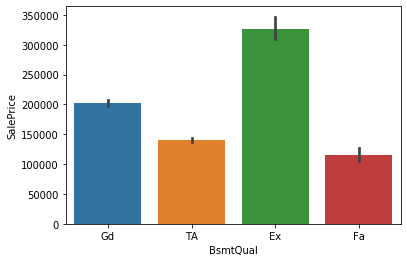

Distinct Values for  BsmtUnfSF  are : 1136


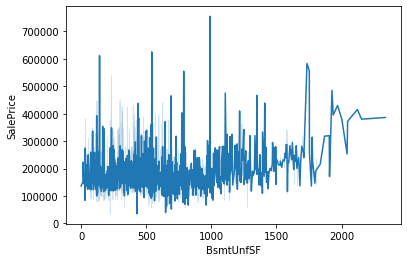

Distinct Values for  CentralAir  are : 2


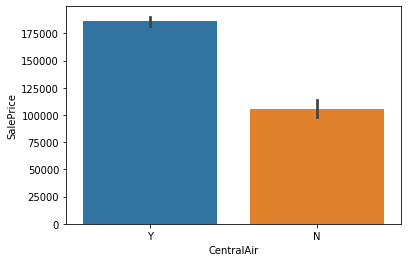

Distinct Values for  Condition1  are : 9


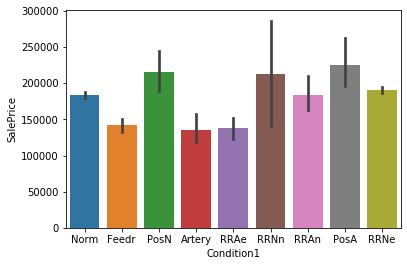

Distinct Values for  Condition2  are : 8


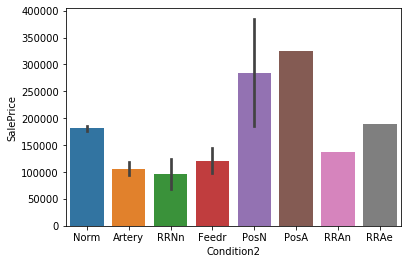

Distinct Values for  Electrical  are : 6


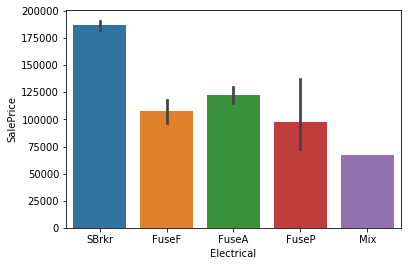

Distinct Values for  EnclosedPorch  are : 183


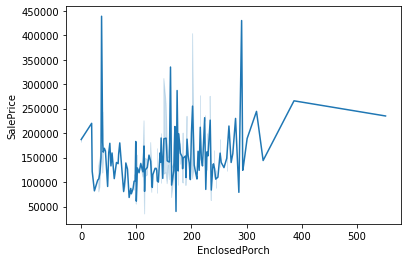

Distinct Values for  ExterCond  are : 5


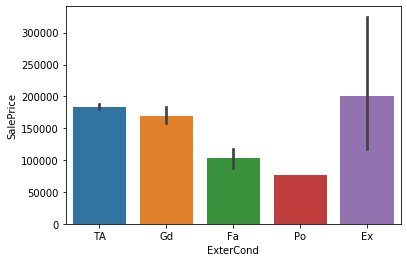

Distinct Values for  ExterQual  are : 4


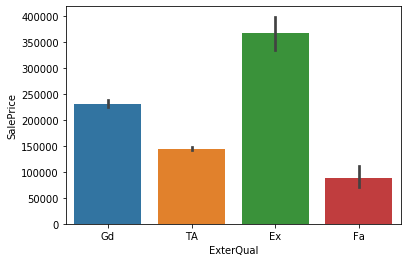

Distinct Values for  Exterior1st  are : 16


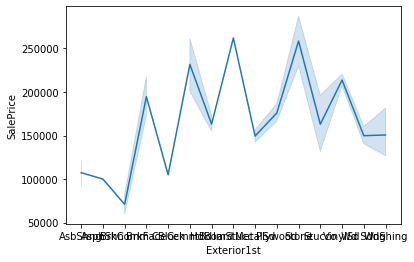

Distinct Values for  Exterior2nd  are : 17


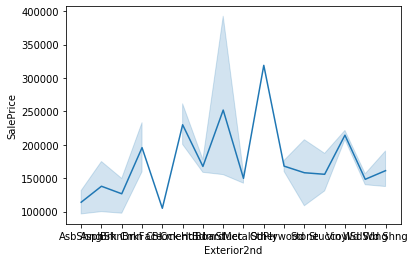

Distinct Values for  Fence  are : 5


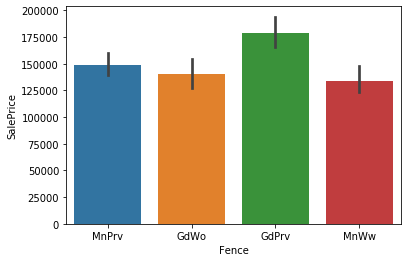

Distinct Values for  FireplaceQu  are : 6


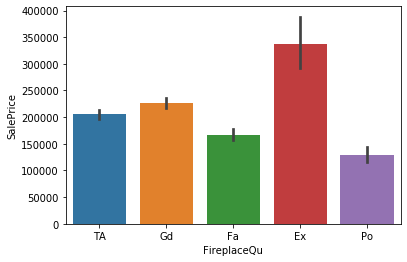

Distinct Values for  Fireplaces  are : 5


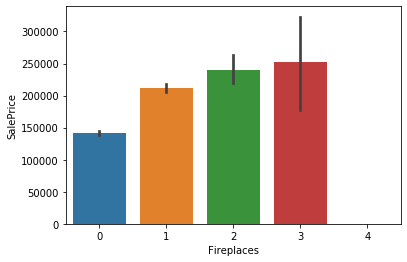

Distinct Values for  Foundation  are : 6


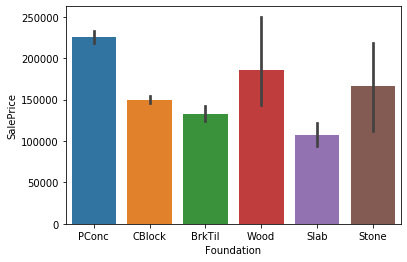

Distinct Values for  FullBath  are : 5


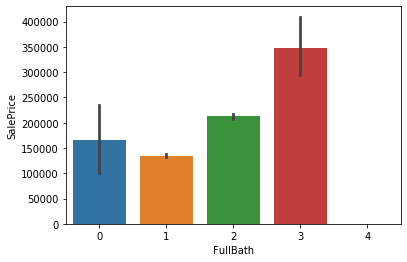

Distinct Values for  Functional  are : 8


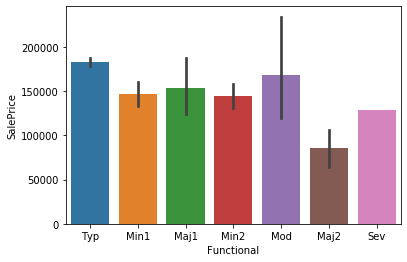

Distinct Values for  GarageArea  are : 604


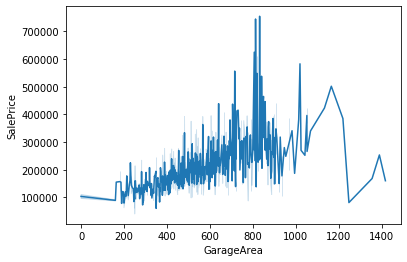

Distinct Values for  GarageCars  are : 7


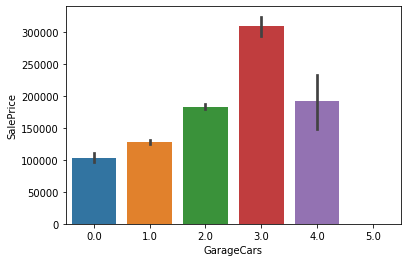

Distinct Values for  GarageCond  are : 6


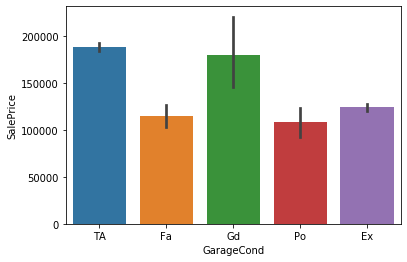

Distinct Values for  GarageFinish  are : 4


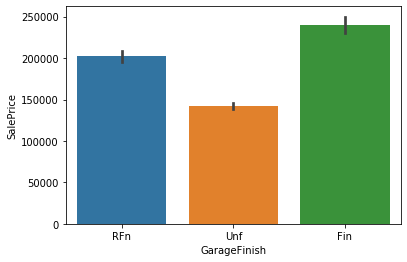

Distinct Values for  GarageQual  are : 6


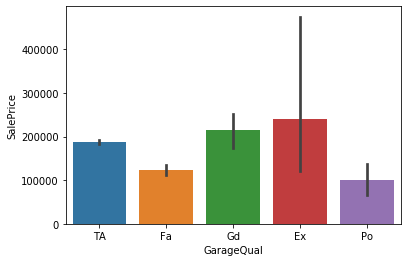

Distinct Values for  GarageType  are : 7


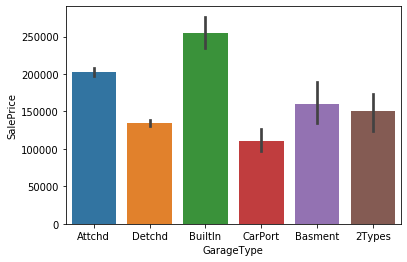

Distinct Values for  GarageYrBlt  are : 104


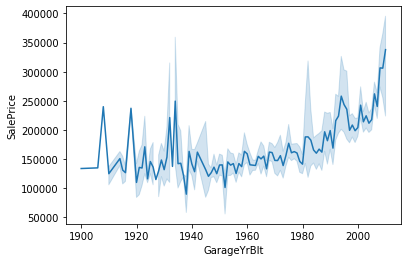

Distinct Values for  GrLivArea  are : 1292


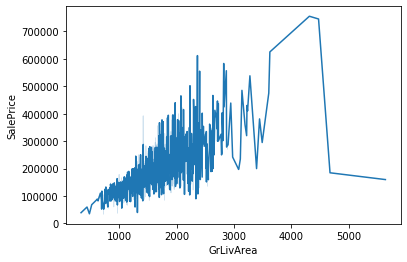

Distinct Values for  HalfBath  are : 3


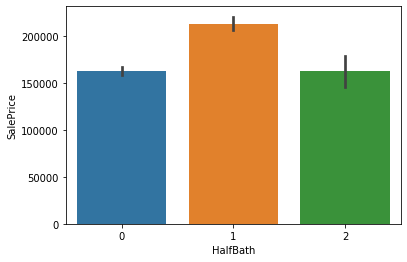

Distinct Values for  Heating  are : 6


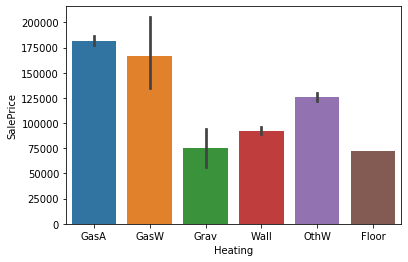

Distinct Values for  HeatingQC  are : 5


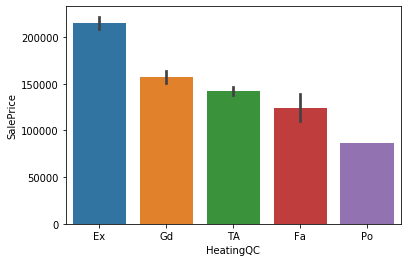

Distinct Values for  HouseStyle  are : 8


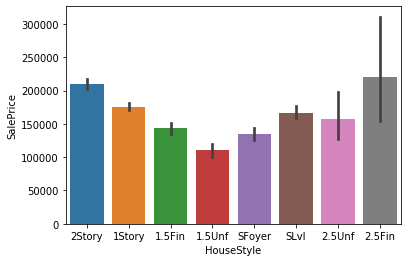

Distinct Values for  Id  are : 2919


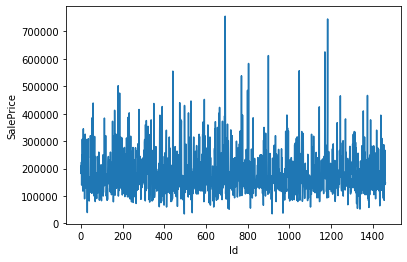

Distinct Values for  KitchenAbvGr  are : 4


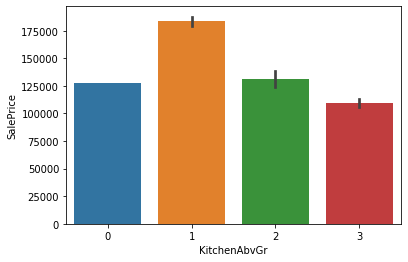

Distinct Values for  KitchenQual  are : 5


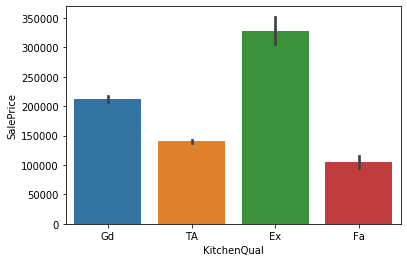

Distinct Values for  LandContour  are : 4


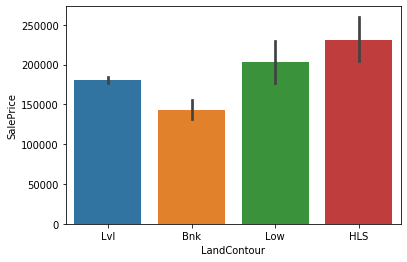

Distinct Values for  LandSlope  are : 3


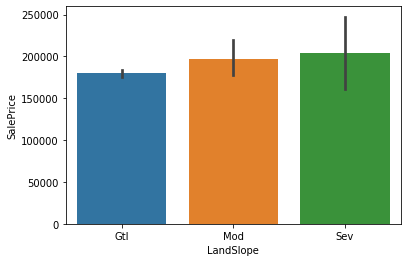

Distinct Values for  LotArea  are : 1951


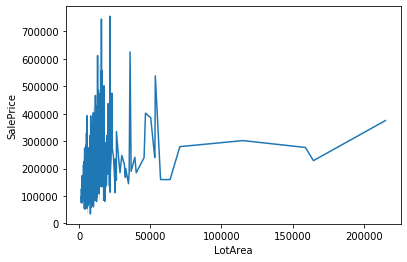

Distinct Values for  LotConfig  are : 5


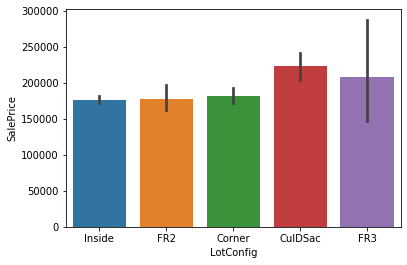

Distinct Values for  LotFrontage  are : 129


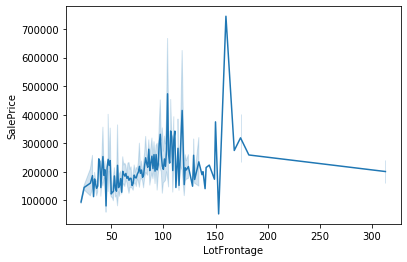

Distinct Values for  LotShape  are : 4


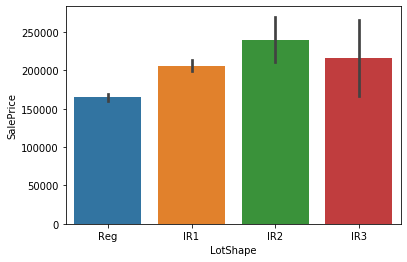

Distinct Values for  LowQualFinSF  are : 36


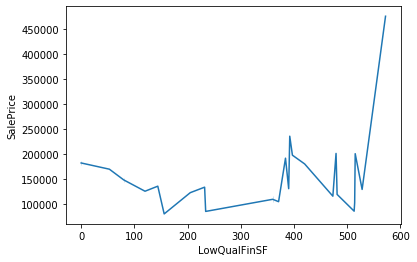

Distinct Values for  MSSubClass  are : 16


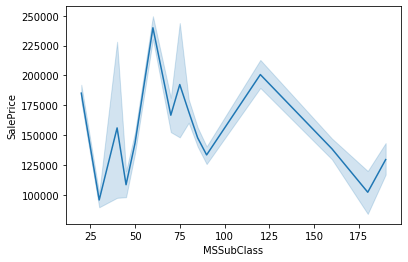

Distinct Values for  MSZoning  are : 6


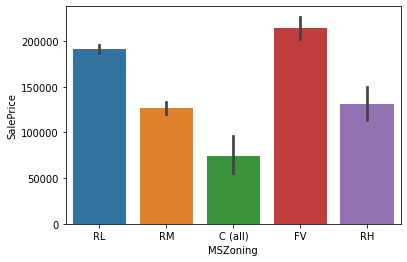

Distinct Values for  MasVnrArea  are : 445


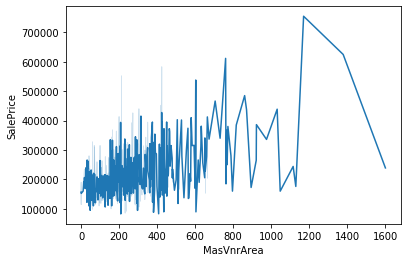

Distinct Values for  MasVnrType  are : 5


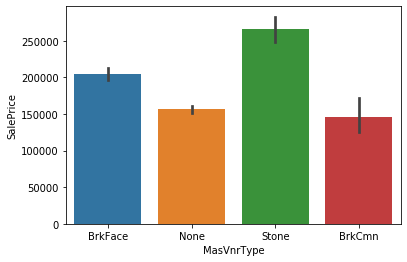

Distinct Values for  MiscFeature  are : 5


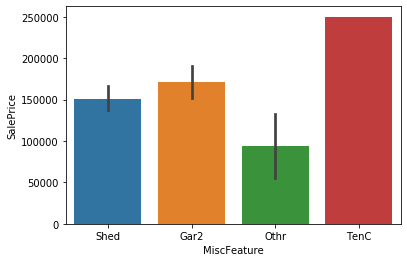

Distinct Values for  MiscVal  are : 38


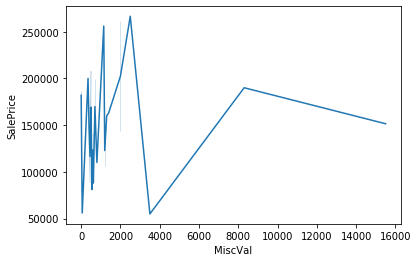

Distinct Values for  MoSold  are : 12


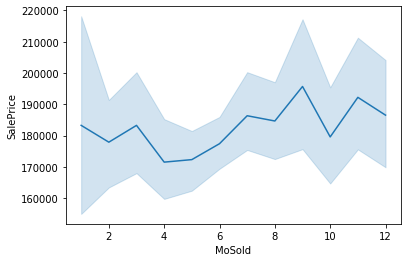

Distinct Values for  Neighborhood  are : 25


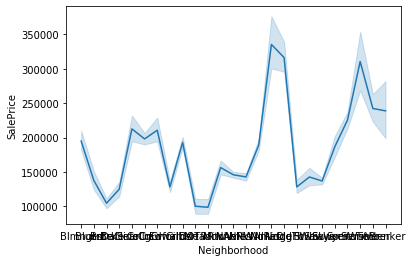

Distinct Values for  OpenPorchSF  are : 252


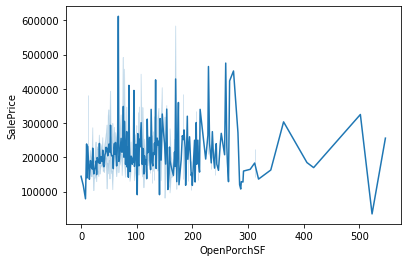

Distinct Values for  OverallCond  are : 9


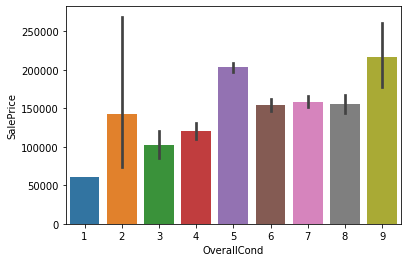

Distinct Values for  OverallQual  are : 10


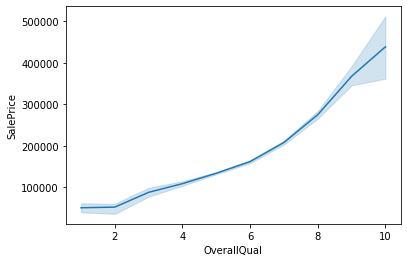

Distinct Values for  PavedDrive  are : 3


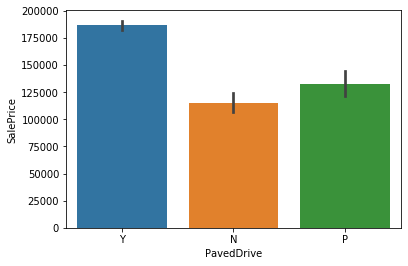

Distinct Values for  PoolArea  are : 14


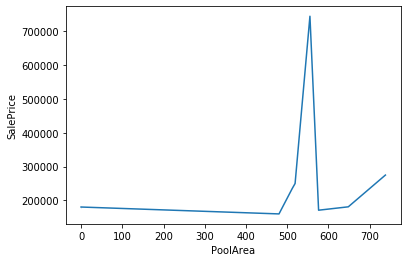

Distinct Values for  PoolQC  are : 4


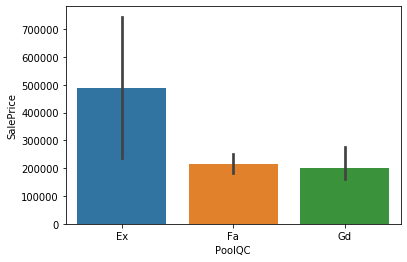

Distinct Values for  RoofMatl  are : 8


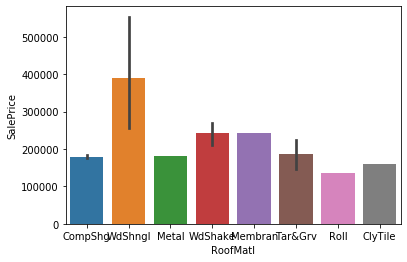

Distinct Values for  RoofStyle  are : 6


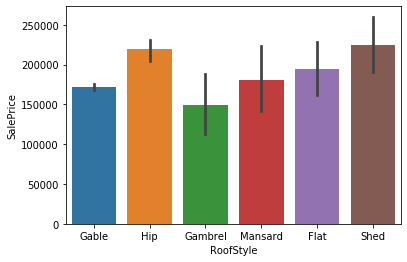

Distinct Values for  SaleCondition  are : 6


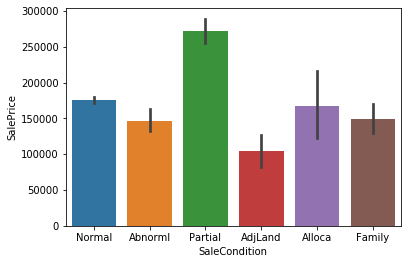

Distinct Values for  SalePrice  are : 664


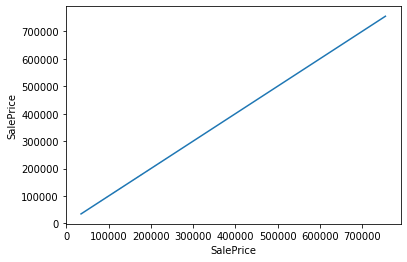

Distinct Values for  SaleType  are : 10


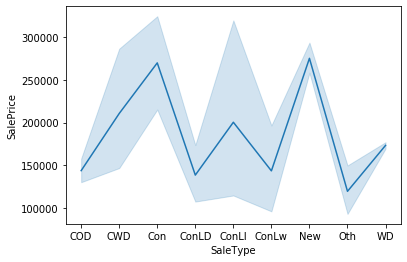

Distinct Values for  ScreenPorch  are : 121


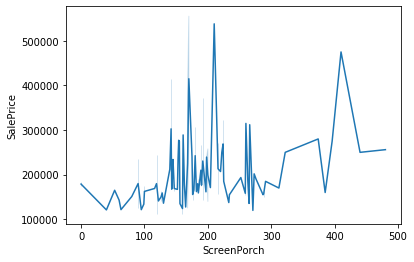

Distinct Values for  Street  are : 2


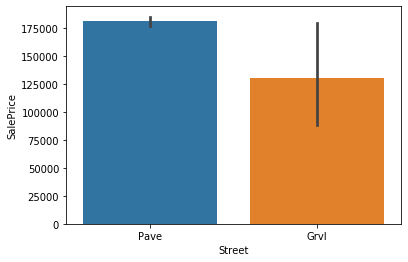

Distinct Values for  TotRmsAbvGrd  are : 14


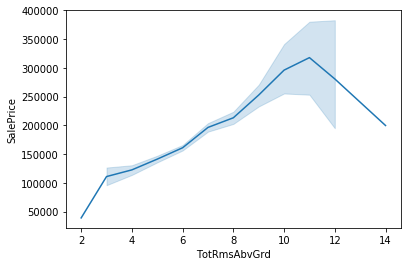

Distinct Values for  TotalBsmtSF  are : 1059


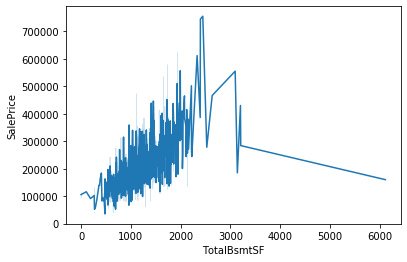

Distinct Values for  Utilities  are : 3


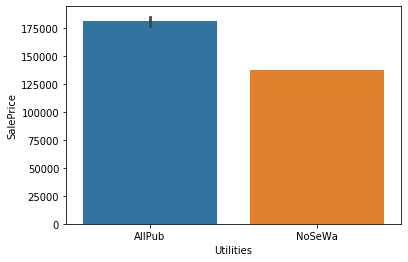

Distinct Values for  WoodDeckSF  are : 379


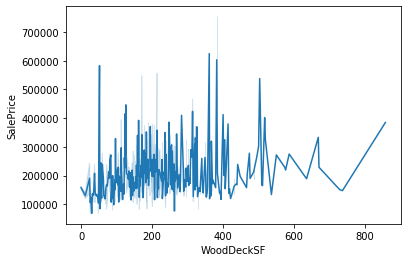

Distinct Values for  YearBuilt  are : 118


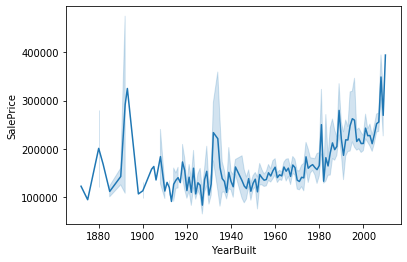

Distinct Values for  YearRemodAdd  are : 61


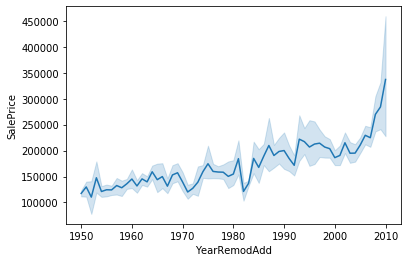

Distinct Values for  YrSold  are : 5


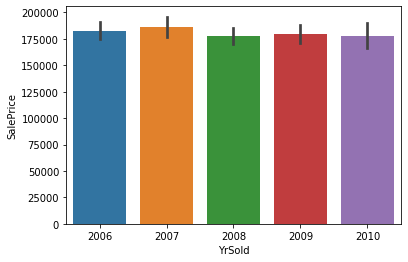

In [53]:
graph_all_columns(data,'SalePrice')

In [27]:
data.isnull().sum()  # finding null per column

1stFlrSF            0
2ndFlrSF            0
3SsnPorch           0
Alley            2721
BedroomAbvGr        0
BldgType            0
BsmtCond           82
BsmtExposure       82
BsmtFinSF1          1
BsmtFinSF2          1
BsmtFinType1       79
BsmtFinType2       80
BsmtFullBath        2
BsmtHalfBath        2
BsmtQual           81
BsmtUnfSF           1
CentralAir          0
Condition1          0
Condition2          0
Electrical          1
EnclosedPorch       0
ExterCond           0
ExterQual           0
Exterior1st         1
Exterior2nd         1
Fence            2348
FireplaceQu      1420
Fireplaces          0
Foundation          0
FullBath            0
Functional          2
GarageArea          1
GarageCars          1
GarageCond        159
GarageFinish      159
GarageQual        159
GarageType        157
GarageYrBlt       159
GrLivArea           0
HalfBath            0
Heating             0
HeatingQC           0
HouseStyle          0
Id                  0
KitchenAbvGr        0
KitchenQua

# Visualization & Data Cleaning

### Cabin

In [28]:
data["1stFlrSF"].value_counts()

864     46
1040    28
912     19
848     18
960     18
        ..
2084     1
2076     1
2064     1
2048     1
2053     1
Name: 1stFlrSF, Length: 1083, dtype: int64

In [ ]:
data["Cabin"].isnull().sum()

In [ ]:
# Replace NA as X, kepp initial
data["Cabin"]=data['Cabin'].fillna('X')
data['Cabin']=data['Cabin'].str.get(0)
# cabin number is like 'A01', 'B99' etc. so just keeping first letter to get category so for A01 -> 'A'

In [ ]:
data["Cabin"].isnull().sum() # all has been filled

In [ ]:
sns.barplot(x="Cabin", y="Survived", data=data) # relation between Cabin and survival

### Embarked

In [ ]:
data['Embarked'].isnull().sum()

In [ ]:
data['Embarked'].value_counts() # embarked - from where, C = Cherbourg, Q = Queenstown, S = Southampton

In [ ]:
data[data['Embarked'].isnull()]

In [ ]:
 sns.boxplot(x="Embarked", y="Fare", hue="Pclass",data=data) # relation between Embarked and Fare for each Class


In [ ]:
sns.barplot(x='Embarked',y="Survived",data=data)

In [ ]:
data['Embarked']=data['Embarked'].fillna('C')

### Fare

In [ ]:
data[data['Fare'].isnull()]

In [ ]:
fare=data[(data['Age'] >60) & (data['Embarked'] == "S") & (data['Pclass'] == 3)].Fare # find all fares matching condition
data['Fare']=data['Fare'].fillna(fare.median()) # find media and assign

In [ ]:
sns.kdeplot(data.loc[data['Survived'] == 0, 'Fare'], label='Died')
sns.kdeplot(data.loc[data['Survived'] == 1, 'Fare'], label='Survived')

### Name

In [ ]:
data.Name

In [ ]:
# Get Title from Name
data["Title"] = data['Name'].apply(lambda x:x.split(',')[1].split('.')[0].strip())
data["Title"].value_counts()

In [ ]:
data["Title"] = data["Title"].replace(['Mlle','Ms'], 'Miss')
data["Title"] = data["Title"].replace(['Mme'], 'Mrs')
data["Title"] = data["Title"].replace(['Rev', 'Dr', 'Col', 'Major', 'Capt'], 'Officer')
data["Title"] = data["Title"].replace(['the Countess', 'Don', 'Lady', 'Sir', 'Jonkheer', 'Dona'], 'Royalty')
data["Title"].value_counts()

In [ ]:
sns.barplot(x="Title", y="Survived", data=data)

### Parch & SibSp

In [ ]:
# Create a family size descriptor from SibSp and Parch
data["Fsize"] = data["SibSp"] + data["Parch"] + 1
sns.factorplot(x="Fsize",y="Survived",data = data)

In [ ]:
# Create new feature of family size
def Fam_label(s):
    if (s >= 2) & (s <= 4):
        return 2
    elif ((s > 4) & (s <= 7)) | (s == 1):
        return 1
    elif (s > 7):
        return 0
data['FamilyLabel']=data['Fsize'].apply(Fam_label)

In [ ]:
sns.barplot(x="FamilyLabel", y="Survived", data=data)

### Pclass

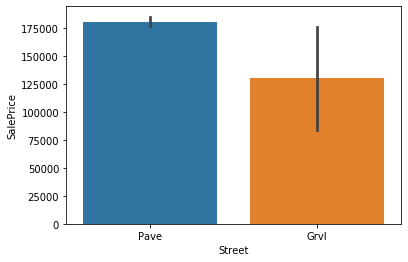

In [33]:
sns.barplot(x="Street", y="SalePrice", data=data)

### Sex

### Ticket

In [ ]:
data['Ticket'].value_counts() # ticket sale per ticket type from 1 to 11

In [ ]:
Ticket_Count = dict(data['Ticket'].value_counts())
data['TicketGroup'] = data['Ticket'].apply(lambda x:Ticket_Count[x])
data['TicketGroup'].value_counts() # group ticket by count of sales

In [ ]:
sns.barplot(x='TicketGroup', y='Survived', data=data)

In [ ]:
def Ticket_Label(s): # group all having same survival together
    if (s >= 2) & (s <= 4):
        return 2
    elif ((s > 4) & (s <= 8)) | (s == 1):
        return 1
    elif (s > 8):
        return 0

data['TicketGroup'] = data['TicketGroup'].apply(Ticket_Label)
sns.barplot(x='TicketGroup', y='Survived', data=data)

### Age

In [ ]:
data.info()

In [ ]:
age_df = data[['Age', 'Pclass','Sex','Title','Fsize']]

# get_dummies() only works on strings, and convert to one-hot encoding
# here it will only work on String columns ( Sex(male/female) and title)
age_df=pd.get_dummies(age_df) # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html
age_df.head()

In [ ]:
age_df[age_df.Age.notnull()].as_matrix()# converts df into 2d matrix/ as below

In [ ]:
known_age = age_df[age_df.Age.notnull()].as_matrix() # Rows with known age
unknown_age = age_df[age_df.Age.isnull()].as_matrix() # Rows with unknown age
y = known_age[:, 0] # age columns
X = known_age[:, 1:] # all other columns
X

In [ ]:
#predicting ages for unknown using XGBoost
rfr=xgboost.XGBClassifier()
rfr.fit(X, y)
predictedAges = rfr.predict(unknown_age[:, 1::])
predictedAges[:10]

In [ ]:
data.loc[(data.Age.isnull()), 'Age' ] = predictedAges #put predicted ages where it was null
data.head()

# Modeling

In [ ]:
data.info()

In [ ]:
data.head(1)

In [ ]:
#choosing required columns and converting to 0/1 for strings
data=data[['Survived','Age','Cabin','Embarked','Fare','Pclass','Sex','TicketGroup','FamilyLabel','Title']]
data=pd.get_dummies(data)
data.head()

In [ ]:
data.tail()

In [ ]:
data.info()

In [ ]:
train=data[:len(raw_train)] # take train data
test=data[len(raw_train):].drop(['Survived'],axis=1) # take test data
x = train.drop(['Survived'],axis=1)
y = train.Survived

In [ ]:
model = ensemble.RandomForestClassifier(random_state = 10, 
                                      warm_start = True,
                                      n_estimators = 26, 
                                      max_depth = 6, 
                                      max_features = 'sqrt')
model.fit(x,y)

In [ ]:
predictions = model.predict(test)
submission = pd.DataFrame({"PassengerId": raw_test["PassengerId"],
                           "Survived": predictions.astype(np.int32)})
submission.to_csv("../ouput/output.csv", index=False)
